## DS501-1802 Phase 3 Capstone

## Bryan Bo Cao

### Github: https://github.com/BryanBo-Cao/data-science/tree/master/music-box/src/BryanBoCao_Code.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
schema_play = ['uid','device','song_id','song_type','song_name','singer','play_time','song_length','paid_flag']
df_play = pd.read_csv('../data/play/20170331_1_play.log',delimiter='\t',header=None,index_col=None,names=schema_play)

/Users/GundamOO/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_play.head()

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
0,167584071.0,ar,4.38999e+06,0.0,魔幻手机,伤感歌曲,0,0.0,0.0
1,168029752.0,ar,1.02636e+06,0.0,你在天边,容中尔甲,0,277.0,0.0
2,167584071.0,ar,503175,0.0,奇迹再现(电视剧《迪加奥特曼》主题曲),毛毛,0,0.0,0.0
3,168029752.0,ar,234903,0.0,梦中的达娃卓玛,容中尔甲,0,315.0,0.0
4,167965547.0,ar,6.60614e+06,0.0,心锁,杨小曼&冷漠,256,256.0,0.0


In [4]:
df_play.describe()

,uid,song_type,song_length,paid_flag
count,1.860168e+06,1.858873e+06,1.859603e+06,1.859670e+06
mean,1.447586e+08,1.422830e-01,3.598380e+02,4.427667e-03
std,5.519367e+07,7.243009e-01,1.069461e+04,1.333122e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,1.676101e+08,0.000000e+00,1.800000e+02,0.000000e+00
50%,1.677840e+08,0.000000e+00,2.340000e+02,0.000000e+00
75%,1.679364e+08,0.000000e+00,2.740000e+02,0.000000e+00
max,1.687785e+08,1.980000e+02,3.103254e+06,4.300000e+02


In [5]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860666 entries, 0 to 1860665
Data columns (total 9 columns):
uid            float64
device         object
song_id        object
song_type      float64
song_name      object
singer         object
play_time      object
song_length    float64
paid_flag      float64
dtypes: float64(4), object(5)
memory usage: 127.8+ MB


In [6]:
song_type_cnts = df_play.song_type.value_counts()
song_type_cnts.head(10)

0.0     1631080
1.0      208354
2.0       18585
3.0         356
40.0         51
30.0         42
34.0         27
39.0         26
33.0         23
31.0         23
Name: song_type, dtype: int64

# Visualize data

In [7]:
song_type_indexes = song_type_cnts.index.values
song_type_indexes = song_type_indexes.tolist()

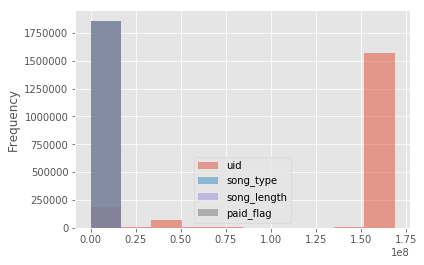

In [8]:
df_play.plot.hist(alpha=0.5)

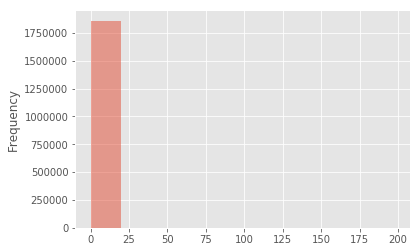

In [9]:
df_play.song_type.plot.hist(alpha=0.5)

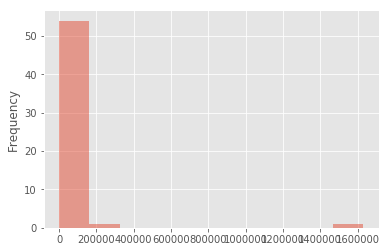

In [10]:
df_play.song_type.value_counts().plot.hist(alpha=0.5)

Apply log to df_play.song_type.value_counts()

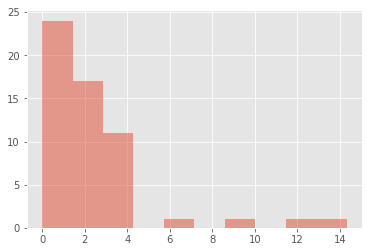

In [11]:
df_play.song_type.value_counts().apply(np.log).hist(alpha=0.5)
plt.show()

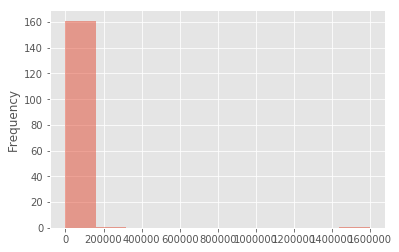

In [12]:
df_play.device.value_counts().plot.hist(alpha=0.5)

Apply log to df_play.device.value_counts()

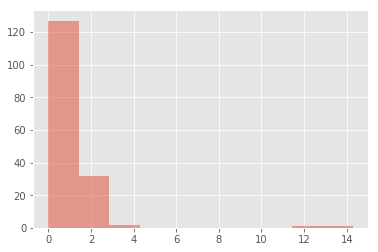

In [13]:
df_play.device.value_counts().apply(np.log).hist(alpha=0.5)
plt.show()

## Deal with missing values
### Find missing values

In [14]:
df_play_song_name_na = pd.isna(df_play.song_name)
na_cnt = 0
for i in df_play_song_name_na:
    if (i):
        na_cnt += 1
print(na_cnt, "missing")

106 missing


### Fill missing value na with 'no_name'

In [15]:
df_play = df_play.fillna(value='no_name')
df_play_song_name_na = pd.isna(df_play.song_name)
na_cnt = 0
for i in df_play_song_name_na:
    if (i):
        na_cnt += 1
print(na_cnt, "missing after filling")

0 missing after filling


## Create training set and test set

In [16]:
from sklearn.cross_validation import train_test_split
df_play_train, df_play_test = train_test_split(
                    df_play, test_size = 0.2, random_state = 64)

/Users/GundamOO/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
df_play_train.head(10)

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag
1250689,1.67584e+08,ar,1169064,0,你把爱情给了谁,龙梅子,236,236,0
1270101,1.68032e+08,ip,6414906,0,See You Again,Wiz Khalifa&Charlie Puth,229,229,0
624718,1.68009e+08,ip,6.05468e+06,0,小跳蛙铃声,网络歌手,33,33,0
900605,1.68009e+08,ip,107471,0,天路,韩红,9,262,0
12580,1.67797e+08,ar,6.29429e+06,0,可惜没如果,林俊杰,214,215,0
971594,1.67724e+08,ar,170121,0,花儿为什么这样红,韦唯,248,249,0
1515555,736305,ar,6.44431e+06,0,佛陀的爱,柯佩磊,203,224,0
1380788,1.68513e+06,ar,3.57778e+06,0,小宝贝快快睡,香香,240,241,0
1223216,1.67736e+08,ar,2.83881e+06,0,长安长安,梁博,124,124,0
168065,1.67742e+08,ar,226130,0,恭喜发财,卓依婷,201,202,0


# Clustering

## Cluster songs based on song_name

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [20]:
df_play_song_name_v = vectorizer.fit_transform(df_play.song_name).toarray()

In [21]:
df_play_song_name_train_v = vectorizer.fit_transform(df_play_train.song_name).toarray()

In [22]:
words = vectorizer.get_feature_names()
words

['01',
 '2002年的第一场雪',
 '2012',
 '2014',
 '2015',
 '2016',
 '25秒铃声版',
 '27秒铃声版',
 '30秒铃声版',
 '31秒铃声版',
 '32秒铃声版',
 '33秒铃声版',
 '34秒铃声版',
 '36秒铃声版',
 '3d',
 '3d环绕',
 '40秒铃声版',
 '48秒铃声版',
 'acoustic',
 'album',
 'animals',
 'anymore',
 'apologize',
 'apos',
 'ar',
 'away',
 'baby',
 'bad',
 'bang',
 'bass',
 'beat',
 'beautiful',
 'beauty',
 'believe',
 'belong',
 'better',
 'big',
 'black',
 'bling',
 'blue',
 'body',
 'bonus',
 'boom',
 'booty',
 'boy',
 'break',
 'burning',
 'bye',
 'cctv音乐频道',
 'cha',
 'christmas',
 'church',
 'city',
 'club',
 'cn',
 'cola',
 'com',
 'come',
 'counting',
 'cover',
 'crazy',
 'daft',
 'dance',
 'darkness',
 'day',
 'dear',
 'deep',
 'demo',
 'detresse',
 'diamonds',
 'did',
 'die',
 'dj',
 'dj加快版',
 'dj版',
 'don',
 'dream',
 'ed',
 'edit',
 'en',
 'end',
 'extended',
 'face',
 'fade',
 'faded',
 'fall',
 'fantastic',
 'far',
 'feat',
 'feel',
 'feeling',
 'fiancée',
 'fly',
 'forever',
 'free',
 'friend',
 'funk',
 'game',
 'girl',
 'god',
 'gonna',
 '

In [23]:
df_play_song_name_train_v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
df_play_song_name_train_v.shape

(1488532, 1000)

In [25]:
from sklearn.cluster import KMeans
km = KMeans()

In [ ]:
km.fit(df_play_song_name_train_v) # very slow :(

In [ ]:
result_cluster = km.predict(df_play_song_name_v)